# Car Classification

The following is a classification project of a data set of car from Kaggle.

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
cars = pd.read_csv('/Users/kryptonempyrean/Desktop/Cars cLASSIFICATION/cars.csv')
cars.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
cars.shape

(1728, 7)

We first analyze the single columns one by one.
The 'buying' column is a categorical one describing the purchase price of the car.

In [4]:
cars.buying.describe()

count      1728
unique        4
top       vhigh
freq        432
Name: buying, dtype: object

In [5]:
cars.buying.value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

We can see that there are no missing values in this column and that the four categories are split equally.

The next column is 'maint', which is still a categorical column with categories for maintenance costs of the car.

In [7]:
cars.maint.describe()

count      1728
unique        4
top       vhigh
freq        432
Name: maint, dtype: object

In [8]:
cars.maint.value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Once again, no missing values and the four categories are split equally.

In [9]:
cars.doors.describe()

count     1728
unique       4
top          2
freq       432
Name: doors, dtype: object

In [10]:
cars.doors.value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

The doors column does not have missing values and we have 4 categories split equally. We can leave it as a categorical variable for now.

In [11]:
cars.persons.describe()

count     1728
unique       3
top          2
freq       576
Name: persons, dtype: object

In [12]:
cars.persons.value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [13]:
cars.lug_boot.describe()

count      1728
unique        3
top       small
freq        576
Name: lug_boot, dtype: object

In [14]:
cars.lug_boot.value_counts()

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

In [15]:
cars.safety.describe()

count     1728
unique       3
top        low
freq       576
Name: safety, dtype: object

In [16]:
cars.safety.value_counts()

safety
low     576
med     576
high    576
Name: count, dtype: int64

In [17]:
cars['class'].describe()

count      1728
unique        4
top       unacc
freq       1210
Name: class, dtype: object

In [19]:
cars['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The 'class' column is our target variable to be predicted. We see how no missing values are found in the data set.

## Preprocessing

We need to encode the categorical variables numerically. We start with those variables where the order of the categories has a meaning, thus needing Ordinal Encoding. These variables will be 'Buying', 'Maint' and 'Safety'.

In [24]:
ordinal_features = ['buying', 'maint', 'safety']
ordinal_categories = [
    ['low', 'med', 'high', 'vhigh'],
    ['low', 'med', 'high', 'vhigh'],
    ['low', 'med', 'high']
]

In [25]:
# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
cars[ordinal_features] = ordinal_encoder.fit_transform(cars[ordinal_features])

cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2,2,small,0.0,unacc
1,3.0,3.0,2,2,small,1.0,unacc
2,3.0,3.0,2,2,small,2.0,unacc
3,3.0,3.0,2,2,med,0.0,unacc
4,3.0,3.0,2,2,med,1.0,unacc


We now need to handle the categorical variables 'doors', 'persons', 'lug_boot', where order is not relevant. We use One-Hot-Encoding.

In [27]:
# Define nominal features
nominal_features = ['doors', 'persons', 'lug_boot']

# Apply One-Hot Encoding
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), nominal_features)
    ],
    remainder='passthrough' 
)

In [30]:
# Apply transformation
encoded_data = one_hot_encoder.fit_transform(cars)

# Convert the result to a DataFrame for better visualization
column_names = (
    one_hot_encoder.named_transformers_['onehot']
    .get_feature_names_out(nominal_features)
    .tolist()
    + [col for col in cars.columns if col not in nominal_features]
)
encoded_data_df = pd.DataFrame(encoded_data, columns=column_names)

In [31]:
encoded_data_df

,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,buying,maint,safety,class
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,unacc
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,unacc
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,unacc
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,unacc
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,unacc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,good
1724,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,vgood
1725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,unacc
1726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,good


We handle the target variable. Given this multi-class classification problem, we go on with Label Encoding.

In [33]:
# Extract the target variable
target = 'class'

# Label Encoding for the target variable
label_encoder = LabelEncoder()
encoded_data_df[target] = label_encoder.fit_transform(encoded_data_df[target])

encoded_data_df

,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,buying,maint,safety,class
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,2
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,2
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1724,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3
1725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1


## Logistic Regression Model

We will start with this model. For this reason we need to scale the data. We will use a Standard Scaler, which is adequate for a Logistic Regression.

In [35]:
# Separate features and target variable
X = encoded_data_df.drop('class', axis=1)  # Drop the target variable
y = encoded_data_df['class']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation and get accuracy scores
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print Cross-Validation Results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the full training set
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.90082645 0.88842975 0.87190083 0.89669421 0.82987552]
Mean CV Accuracy: 0.877545351668324

Test Set Accuracy: 0.8689788053949904

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       118
           1       0.47      0.37      0.41        19
           2       0.92      0.95      0.93       358
           3       0.87      0.83      0.85        24

    accuracy                           0.87       519
   macro avg       0.75      0.71      0.73       519
weighted avg       0.86      0.87      0.87       519



We see a poor performance in classifying class 1 due to the restricted support, thus the unbalanced sample.
Overall the performance is good for larger classes but there is room for imporvement for class 1.

In [38]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation and get accuracy scores
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=skf, scoring='accuracy')

# Print Cross-Validation Results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the full training set
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.89669421 0.89256198 0.88429752 0.88842975 0.86721992]
Mean CV Accuracy: 0.8858406776173655

Test Set Accuracy: 0.8921001926782274

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       118
           1       0.53      0.84      0.65        19
           2       0.98      0.91      0.94       358
           3       0.73      1.00      0.84        24

    accuracy                           0.89       519
   macro avg       0.76      0.89      0.81       519
weighted avg       0.91      0.89      0.90       519



We tried to use class weights in the Regression to penalize missclassifications for smaller classes and indeed the f1-scores improve for all the categories, especially for class 1. The test score also bumps up to 0.892.

## Decision Tree Model

In [40]:
# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=None,class_weight=None)

# Perform Cross-Validation
cv_scores_tree = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results
print("Decision Tree Cross-Validation Accuracy Scores:", cv_scores_tree)
print("Mean CV Accuracy:", cv_scores_tree.mean())

# Train the Decision Tree on the full training set
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_tree))

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Decision Tree Cross-Validation Accuracy Scores: [0.97520661 0.96280992 0.97520661 0.95867769 0.95850622]
Mean CV Accuracy: 0.9660814101025341

Test Set Accuracy: 0.9672447013487476

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       118
           1       0.74      0.89      0.81        19
           2       0.99      1.00      0.99       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519


Confusion Matrix:
[[107   6   4   1]
 [  1  17   0   1]
 [  1   0 357   0]
 [  3   0   0  21]]


Optimal max_depth: 10
Best Cross-Validation Accuracy: 0.9686


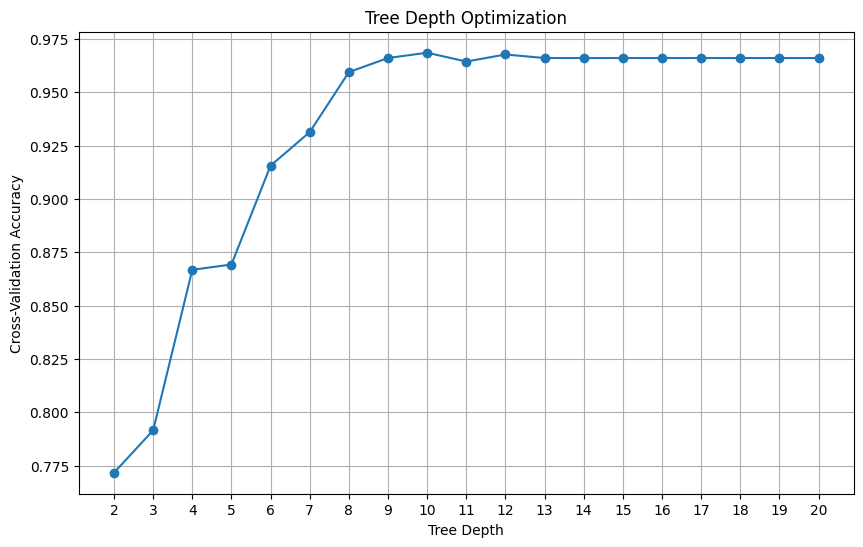


Final Test Set Accuracy: 0.9672447013487476

Final Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       118
           1       0.74      0.89      0.81        19
           2       0.99      0.99      0.99       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



In [42]:
# Test different depths
depths = range(2, 21)
cv_scores = []

# Evaluate performance for each depth
for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal depth
optimal_depth = depths[np.argmax(cv_scores)]
print(f"Optimal max_depth: {optimal_depth}")
print(f"Best Cross-Validation Accuracy: {max(cv_scores):.4f}")

# Plot accuracy vs. tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, cv_scores, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Tree Depth Optimization')
plt.xticks(depths)
plt.grid(True)
plt.show()

# Train final model with the optimal depth
final_tree_clf = DecisionTreeClassifier(random_state=42, max_depth=optimal_depth)
final_tree_clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_final = final_tree_clf.predict(X_test)
print("\nFinal Test Set Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

## Random Forest

In [46]:
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Cross-validation to evaluate performance
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results
print("Random Forest Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

# Train Random Forest on full training set
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Cross-Validation Accuracy Scores: [0.96280992 0.9214876  0.94214876 0.91735537 0.92946058]
Mean CV Accuracy: 0.934652446761085

Test Set Accuracy: 0.9499036608863198

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       118
           1       0.67      0.63      0.65        19
           2       0.98      0.99      0.99       358
           3       1.00      0.83      0.91        24

    accuracy                           0.95       519
   macro avg       0.88      0.84      0.86       519
weighted avg       0.95      0.95      0.95       519


Confusion Matrix:
[[105   6   7   0]
 [  7  12   0   0]
 [  2   0 356   0]
 [  4   0   0  20]]


We see underperformance of the Random Forest compared to the Decision Tree.